In [1]:
import os
os.chdir('C:\\Users\\USER\\Music\\Python')

In [7]:
import pandas as pd
df=pd.read_csv('Insurance.csv')

In [16]:
# =========================
# 1. IMPORT LIBRARIES
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

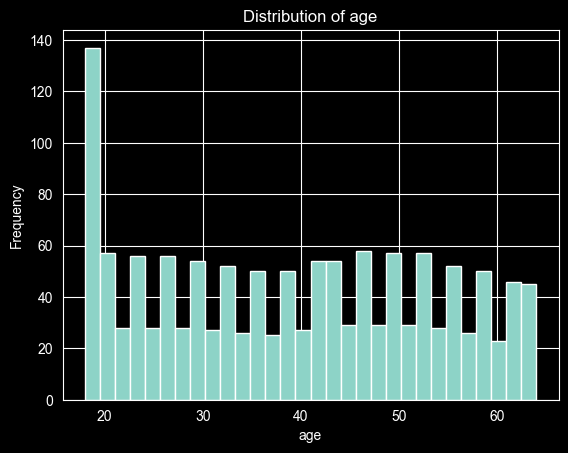

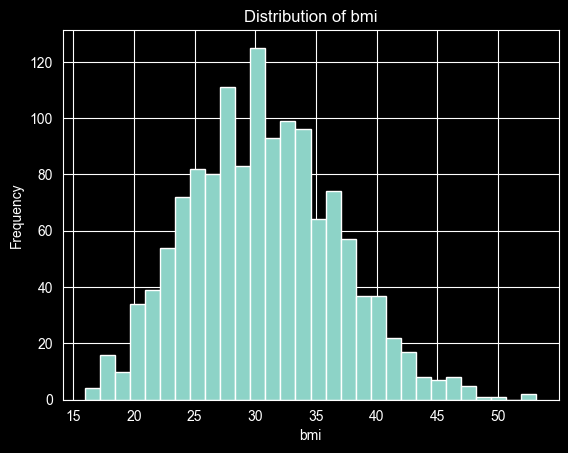

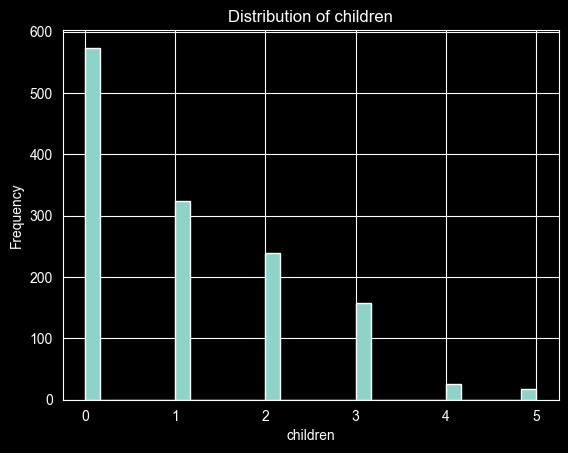

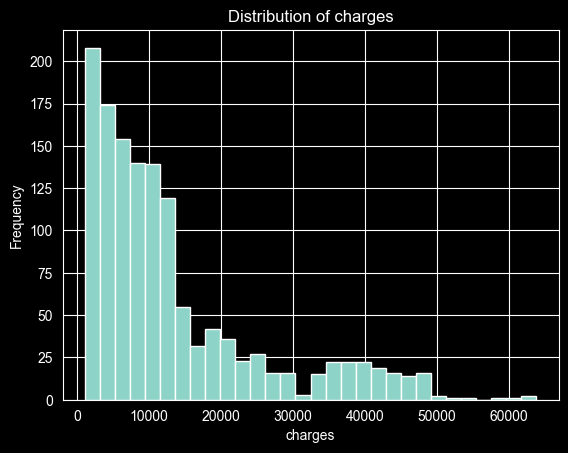

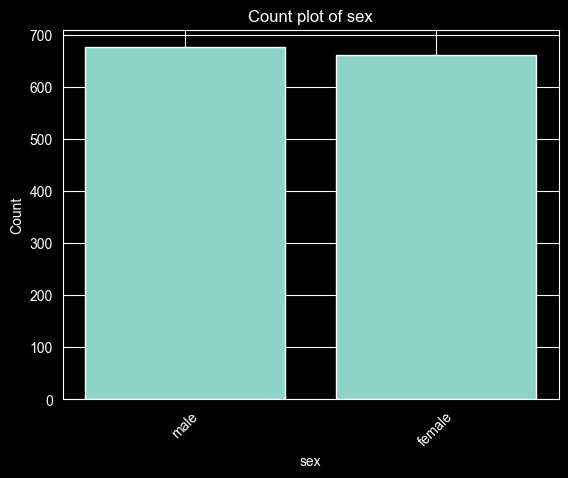

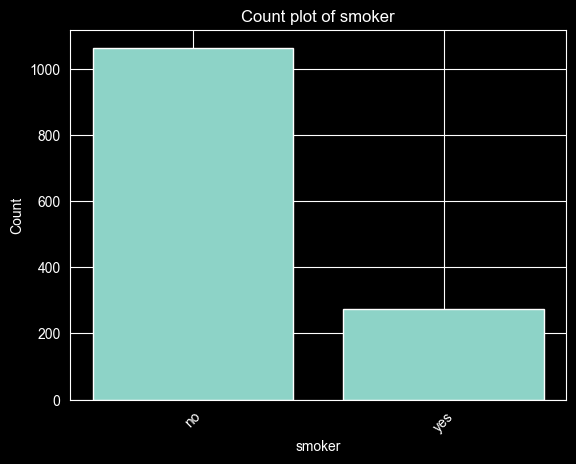

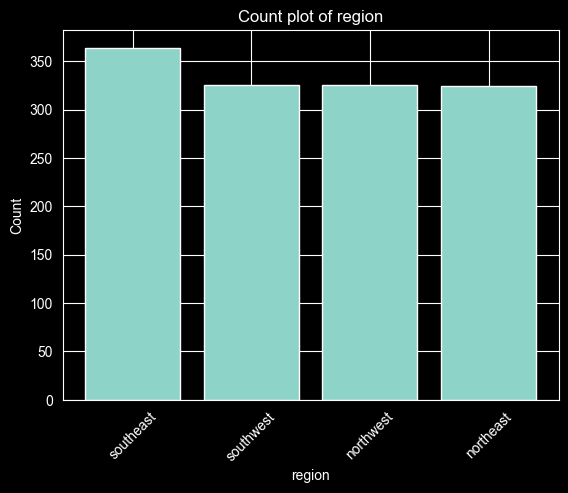

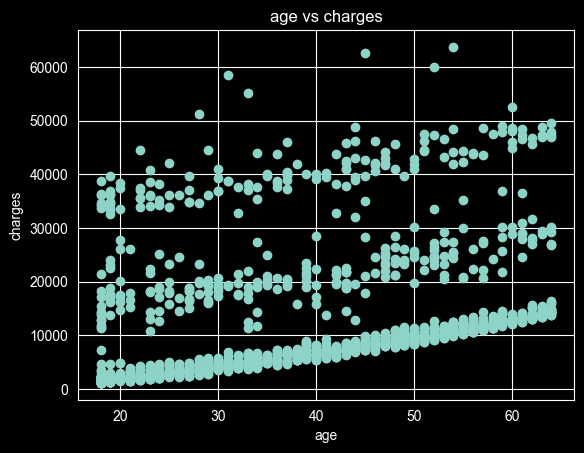

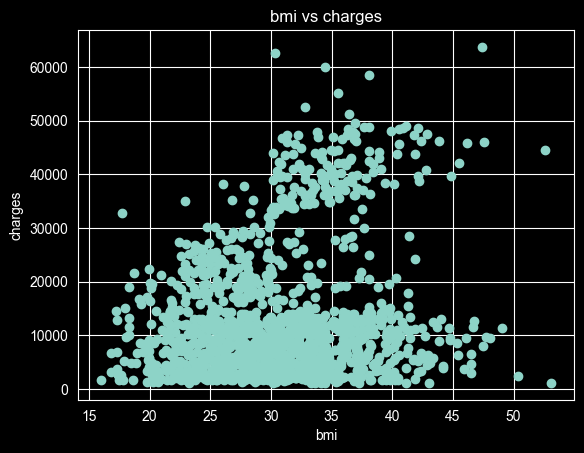

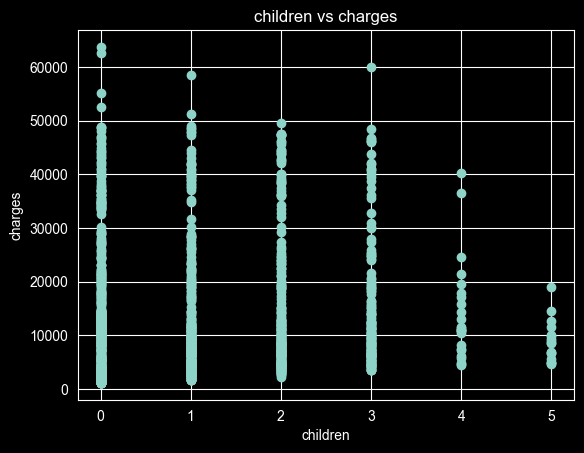

<Figure size 640x480 with 0 Axes>

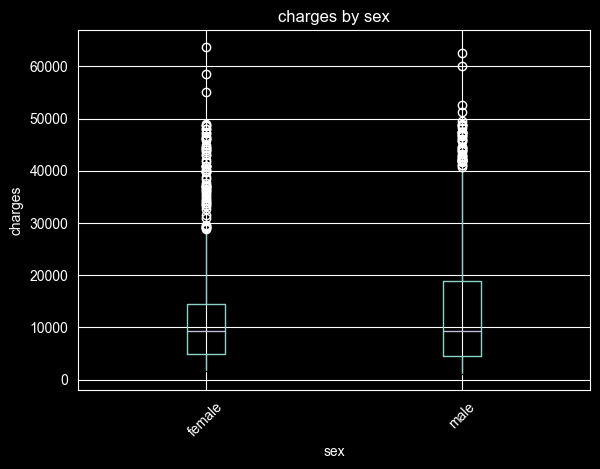

<Figure size 640x480 with 0 Axes>

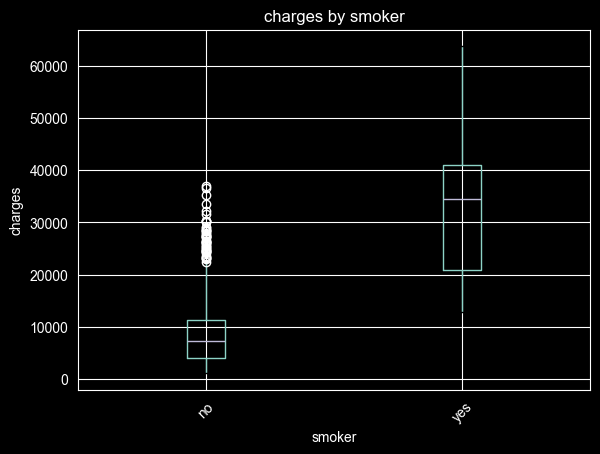

<Figure size 640x480 with 0 Axes>

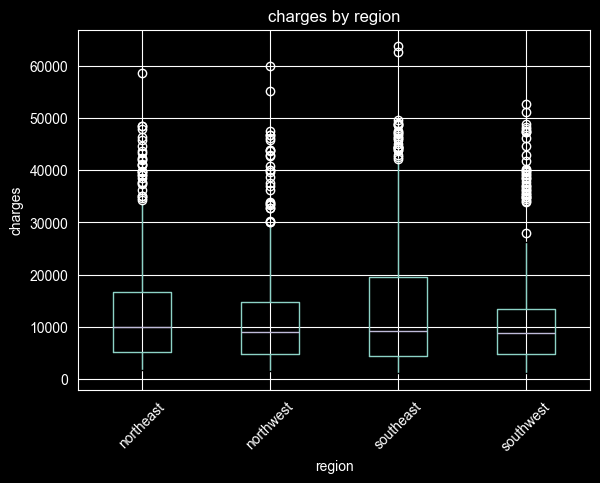

In [17]:


# =========================
# EDA: UNIVARIATE & BIVARIATE ANALYSIS
# =========================
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -------------------------
# Identify column types
# -------------------------
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns


# =========================
# 1. UNIVARIATE ANALYSIS
# =========================

# ---- Numeric features: Histograms ----
for col in num_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


# ---- Categorical features: Bar plots ----
for col in cat_cols:
    counts = df[col].value_counts()
    plt.figure()
    plt.bar(counts.index.astype(str), counts.values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Count plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


# =========================
# 2. BIVARIATE ANALYSIS
# =========================

# ---- Numeric vs Target (Scatter plots) ----
target = "charges"

for col in num_cols:
    if col != target:
        plt.figure()
        plt.scatter(df[col], df[target])
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f"{col} vs {target}")
        plt.show()


# ---- Categorical vs Target (Box plots) ----
for col in cat_cols:
    plt.figure()
    df.boxplot(column=target, by=col)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{target} by {col}")
    plt.suptitle("")  # removes automatic pandas title
    plt.xticks(rotation=45)
    plt.show()



In [19]:

# =========================
# 2. TARGET & FEATURES
# =========================
# Assume df already loaded
X = df.drop(columns="charges")
y = df["charges"]

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols
cat_cols


Index(['sex', 'smoker', 'region'], dtype='object')

In [21]:

# =========================
# 3. OUTLIER HANDLING (IQR)
# =========================
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

X = df_clean.drop(columns="charges")
y = df_clean["charges"]
print(X)
print(y)

      age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1329 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64


In [22]:

# =========================
# 4. TRAIN-TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train)
print(X_test)

      age     sex     bmi  children smoker     region
849    55    male  32.775         0     no  northwest
171    49    male  30.300         0     no  southwest
948    42    male  31.255         0     no  northwest
464    19    male  25.175         0     no  northwest
210    20    male  33.000         1     no  southwest
...   ...     ...     ...       ...    ...        ...
1103   58    male  36.080         0     no  southeast
1138   33    male  30.250         0     no  southeast
1302   25  female  20.800         1     no  southwest
866    18    male  37.290         0     no  southeast
1134   28    male  33.820         0     no  northwest

[1063 rows x 6 columns]
      age     sex     bmi  children smoker     region
899    19  female  22.515         0     no  northwest
115    60    male  28.595         0     no  northeast
529    18    male  25.460         0     no  northeast
176    38    male  27.835         2     no  northwest
63     28  female  25.935         1     no  northwest
...

In [23]:

# =========================
# 5. MISSING VALUE IMPUTATION
# =========================
num_imputer = SimpleImputer(strategy="median")
X_train_num = num_imputer.fit_transform(X_train[num_cols])
X_test_num = num_imputer.transform(X_test[num_cols])

cat_imputer = SimpleImputer(strategy="most_frequent")
X_train_cat = cat_imputer.fit_transform(X_train[cat_cols])
X_test_cat = cat_imputer.transform(X_test[cat_cols])
print(X_train_cat)
print(X_test_cat)


[['male' 'no' 'northwest']
 ['male' 'no' 'southwest']
 ['male' 'no' 'northwest']
 ...
 ['female' 'no' 'southwest']
 ['male' 'no' 'southeast']
 ['male' 'no' 'northwest']]
[['female' 'no' 'northwest']
 ['male' 'no' 'northeast']
 ['male' 'no' 'northeast']
 ['male' 'no' 'northwest']
 ['female' 'no' 'northwest']
 ['female' 'no' 'southeast']
 ['female' 'no' 'southeast']
 ['female' 'no' 'northeast']
 ['female' 'yes' 'northeast']
 ['male' 'no' 'northwest']
 ['female' 'yes' 'northeast']
 ['female' 'yes' 'southeast']
 ['male' 'no' 'southeast']
 ['male' 'yes' 'southeast']
 ['female' 'no' 'southeast']
 ['male' 'no' 'northwest']
 ['male' 'no' 'northwest']
 ['male' 'no' 'northeast']
 ['male' 'no' 'southeast']
 ['male' 'yes' 'southeast']
 ['male' 'no' 'southwest']
 ['female' 'no' 'northwest']
 ['male' 'no' 'southwest']
 ['female' 'no' 'southwest']
 ['male' 'no' 'northeast']
 ['male' 'yes' 'northeast']
 ['female' 'no' 'southwest']
 ['male' 'no' 'northeast']
 ['male' 'no' 'southwest']
 ['female' 'no' '

In [24]:

# =========================
# 6. ONE-HOT ENCODING
# =========================
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)

# FORCE 2D (handles single-column edge case)
X_train_cat_enc = np.atleast_2d(X_train_cat_enc)
X_test_cat_enc = np.atleast_2d(X_test_cat_enc)

# If shape is (n_features,) convert to (n_samples, 1)
if X_train_cat_enc.ndim == 1:
    X_train_cat_enc = X_train_cat_enc.reshape(-1, 1)
if X_test_cat_enc.ndim == 1:
    X_test_cat_enc = X_test_cat_enc.reshape(-1, 1)

print(X_train_cat_enc)
print(X_test_cat_enc)

[[1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]]


In [25]:

# =========================
# 7. FEATURE SCALING
# =========================
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

print(X_train_num_scaled)
print(X_test_num_scaled)

[[ 1.12560968  0.3780031  -0.88947791]
 [ 0.70075831 -0.04020807 -0.88947791]
 [ 0.20509837  0.1211623  -0.88947791]
 ...
 [-0.9986472  -1.64546309 -0.05935059]
 [-1.49430714  1.14092167 -0.88947791]
 [-0.78622151  0.55458115 -0.88947791]]
[[-1.42349857 -1.35567232 -0.88947791]
 [ 1.4796525  -0.32830911 -0.88947791]
 [-1.49430714 -0.85804326 -0.88947791]
 [-0.07813588 -0.45672951  0.77077674]
 [-0.78622151 -0.77778051 -0.05935059]
 [ 0.91318399 -0.95942779 -0.88947791]
 [-0.9986472   0.58330677 -0.05935059]
 [-1.21107289 -1.24330447 -0.88947791]
 [ 1.40884393  1.05221021 -0.05935059]
 [ 1.62126962 -0.08752085 -0.88947791]
 [ 0.84237543  0.74721176  0.77077674]
 [-0.64460438 -0.36463856 -0.05935059]
 [-0.36137013  0.6204811  -0.88947791]
 [-0.21975301  0.78776557 -0.05935059]
 [-0.71541295 -0.16017976 -0.05935059]
 [-0.36137013  0.89168471 -0.88947791]
 [ 0.06348124  0.0569521   2.43103139]
 [ 0.34671549 -1.46804017  1.60090406]
 [ 1.05480112 -1.60997851  0.77077674]
 [ 0.06348124 -1.81

In [26]:

# =========================
# 8. FINAL FEATURE MATRIX
# =========================
# Ensure numeric arrays are also 2D
X_train_num_scaled = np.atleast_2d(X_train_num_scaled)
X_test_num_scaled = np.atleast_2d(X_test_num_scaled)

X_train_final = np.hstack((X_train_num_scaled, X_train_cat_enc))
X_test_final = np.hstack((X_test_num_scaled, X_test_cat_enc))
print(X_train_final)
print(X_test_final)

[[ 1.12560968  0.3780031  -0.88947791 ...  1.          0.
   0.        ]
 [ 0.70075831 -0.04020807 -0.88947791 ...  0.          0.
   1.        ]
 [ 0.20509837  0.1211623  -0.88947791 ...  1.          0.
   0.        ]
 ...
 [-0.9986472  -1.64546309 -0.05935059 ...  0.          0.
   1.        ]
 [-1.49430714  1.14092167 -0.88947791 ...  0.          1.
   0.        ]
 [-0.78622151  0.55458115 -0.88947791 ...  1.          0.
   0.        ]]
[[-1.42349857 -1.35567232 -0.88947791 ...  1.          0.
   0.        ]
 [ 1.4796525  -0.32830911 -0.88947791 ...  0.          0.
   0.        ]
 [-1.49430714 -0.85804326 -0.88947791 ...  0.          0.
   0.        ]
 ...
 [ 1.05480112  0.1794584  -0.88947791 ...  0.          0.
   1.        ]
 [-0.4321787  -0.38322573 -0.05935059 ...  0.          1.
   0.        ]
 [ 0.77156687 -0.88507914 -0.88947791 ...  0.          1.
   0.        ]]


In [27]:

# =========================
# 9. LINEAR REGRESSION
# =========================
lr = LinearRegression()
lr.fit(X_train_final, y_train)
r2_lr = r2_score(y_test, lr.predict(X_test_final))
print(r2_lr)

0.7671119511350497


In [28]:

# =========================
# 10. RIDGE REGRESSION
# =========================
ridge = Ridge()
ridge_params = {"alpha": np.logspace(-3, 3, 50)}

ridge_cv = GridSearchCV(ridge, ridge_params, scoring="r2", cv=5)
ridge_cv.fit(X_train_final, y_train)

best_ridge = ridge_cv.best_estimator_
r2_ridge = r2_score(y_test, best_ridge.predict(X_test_final))
print(r2_ridge)

0.7671377507455759


In [29]:

# =========================
# 11. LASSO REGRESSION
# =========================
lasso = Lasso(max_iter=10000)
lasso_params = {"alpha": np.logspace(-4, 1, 50)}

lasso_cv = GridSearchCV(lasso, lasso_params, scoring="r2", cv=5)
lasso_cv.fit(X_train_final, y_train)

best_lasso = lasso_cv.best_estimator_
r2_lasso = r2_score(y_test, best_lasso.predict(X_test_final))
print(r2_lasso)

0.767465173544752


In [30]:


# =========================
# 12. ELASTICNET REGRESSION
# =========================
elastic = ElasticNet(max_iter=10000)
elastic_params = {
    "alpha": np.logspace(-4, 1, 20),
    "l1_ratio": np.linspace(0.1, 0.9, 9)
}

elastic_cv = GridSearchCV(elastic, elastic_params, scoring="r2", cv=5)
elastic_cv.fit(X_train_final, y_train)

best_elastic = elastic_cv.best_estimator_
r2_elastic = r2_score(y_test, best_elastic.predict(X_test_final))
print(r2_elastic)

0.7671247403883545


In [31]:

# =========================
# 13. MODEL COMPARISON
# =========================
results = {
    "Linear Regression": r2_lr,
    "Ridge Regression": r2_ridge,
    "Lasso Regression": r2_lasso,
    "ElasticNet Regression": r2_elastic
}

print("\nMODEL PERFORMANCE (Test R²):")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

best_model = max(results, key=results.get)
print("\nBEST MODEL:", best_model)



MODEL PERFORMANCE (Test R²):
Linear Regression: 0.7671
Ridge Regression: 0.7671
Lasso Regression: 0.7675
ElasticNet Regression: 0.7671

BEST MODEL: Lasso Regression


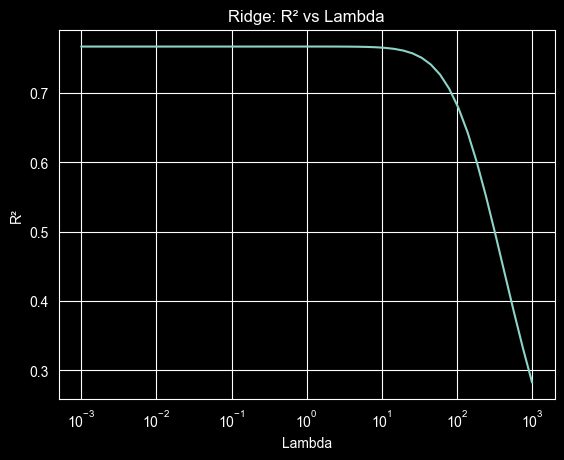

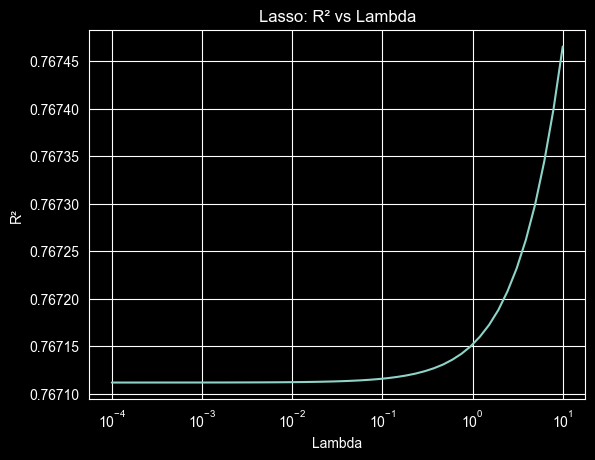

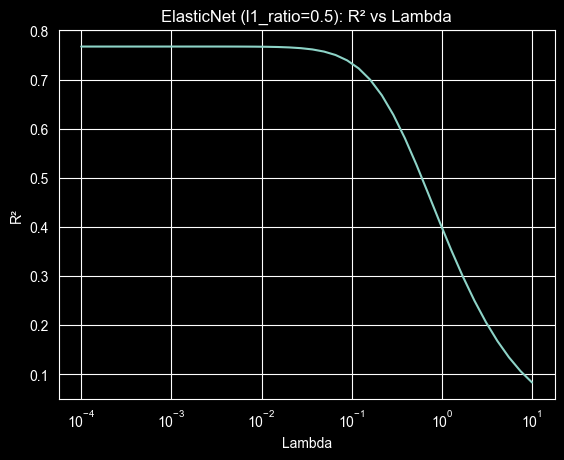

In [32]:

# =========================
# 14. R² vs LAMBDA PLOTS
# =========================
# Ridge
ridge_alphas = np.logspace(-3, 3, 50)
ridge_r2 = []

for a in ridge_alphas:
    m = Ridge(alpha=a)
    m.fit(X_train_final, y_train)
    ridge_r2.append(r2_score(y_test, m.predict(X_test_final)))

plt.figure()
plt.semilogx(ridge_alphas, ridge_r2)
plt.xlabel("Lambda")
plt.ylabel("R²")
plt.title("Ridge: R² vs Lambda")
plt.show()


# Lasso
lasso_alphas = np.logspace(-4, 1, 50)
lasso_r2 = []

for a in lasso_alphas:
    m = Lasso(alpha=a, max_iter=10000)
    m.fit(X_train_final, y_train)
    lasso_r2.append(r2_score(y_test, m.predict(X_test_final)))

plt.figure()
plt.semilogx(lasso_alphas, lasso_r2)
plt.xlabel("Lambda")
plt.ylabel("R²")
plt.title("Lasso: R² vs Lambda")
plt.show()


# ElasticNet
best_l1 = elastic_cv.best_params_["l1_ratio"]
elastic_alphas = np.logspace(-4, 1, 40)
elastic_r2 = []

for a in elastic_alphas:
    m = ElasticNet(alpha=a, l1_ratio=best_l1, max_iter=10000)
    m.fit(X_train_final, y_train)
    elastic_r2.append(r2_score(y_test, m.predict(X_test_final)))

plt.figure()
plt.semilogx(elastic_alphas, elastic_r2)
plt.xlabel("Lambda")
plt.ylabel("R²")
plt.title(f"ElasticNet (l1_ratio={best_l1}): R² vs Lambda")
plt.show()

In [33]:


# =========================
# 15. IMPORTANT FEATURES
# =========================
num_features = num_cols.tolist()
cat_features = encoder.get_feature_names_out(cat_cols).tolist()
feature_names = num_features + cat_features

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": best_elastic.coef_
})

coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

print("\nTOP 10 FACTORS DRIVING INSURANCE CHARGES:")
print(coef_df.head(10))



TOP 10 FACTORS DRIVING INSURANCE CHARGES:
            Feature   Coefficient  Abs_Coefficient
4        smoker_yes  23375.157456     23375.157456
0               age   3601.530786      3601.530786
1               bmi   1974.697192      1974.697192
7  region_southwest  -1236.929887      1236.929887
6  region_southeast  -1168.611971      1168.611971
2          children    627.391840       627.391840
5  region_northwest   -433.270636       433.270636
3          sex_male   -101.084890       101.084890
